**Supritha M Bhatt** **Task 3**
**Exploratory Data Analysis **

##Importing Libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns #helps in data visualization


##Importing Dataset

In [2]:
dataset = pd.read_csv('SampleSuperstore.csv')

##Understanding data by undertanding variables in it

Dataset

In [3]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
dataset.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


Check Presence of Null values

In [5]:
dataset.isna().sum()
#Since no null value no worries about replacing null values or dropping a column

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Shape of the dataset

In [6]:
dataset.shape

(9994, 13)

In [7]:
dataset.describe()
#Numerically trying to understand the data

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

Lets check for nunique value method <-- returns a series with number of distinct observations over requested access

In [9]:
dataset.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

Lets check unique values in a specific column

In [10]:
dataset['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [11]:
dataset['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

##Cleaning data
Dropping redundant values.
We will remove Country, City, Postal code columns from dataset as they wont affect much. We'll also drop Region because its almost same as State.

In [12]:
new_data = dataset.drop(['Country','City','Postal Code','Region'], axis=1)

In [13]:
new_data.head()

,Ship Mode,Segment,State,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Kentucky,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Kentucky,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,California,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Florida,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Florida,Office Supplies,Storage,22.3680,2,0.20,2.5164


##Relationship Analysis

Correlation Matrix <-- Is a table which shows correlation coefficient between varibles. Each cell shows correlation between 2 variables.
Used to summarize data as input into more advance analysis

In [20]:
correlation_variable = new_data.corr()

Now lets put the obtained correlation in heatmap using the seaborn library variable

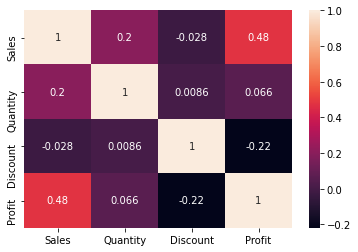

In [21]:
sns.heatmap(correlation_variable,xticklabels=correlation_variable.columns,yticklabels=correlation_variable.columns,annot=True)

Pairplot <--
We use it to visualize the relation between two variables.
Here variables can be booleans, categorical, continuous.
Its a grid of plot for each variable in dataset.

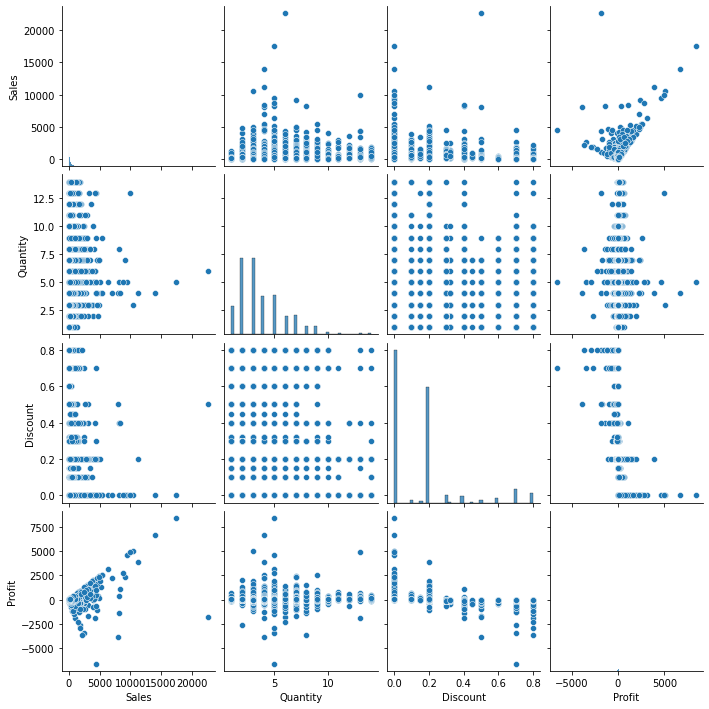

In [22]:
sns.pairplot(new_data)

Both Pairplot and Heatmap are not so very precise so lets try scatter plot.
`Scatter plot shows relation between two numerical variables.`

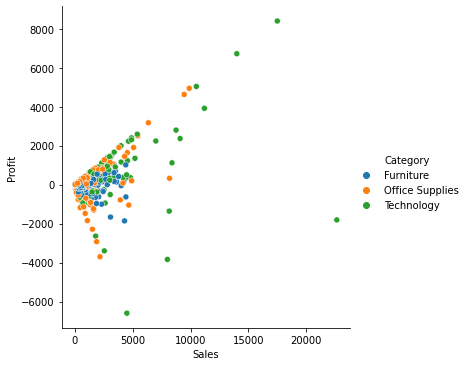

In [23]:
sns.relplot(x='Sales',y='Profit', hue='Category', data=new_data) #relplot is type of scatter plot

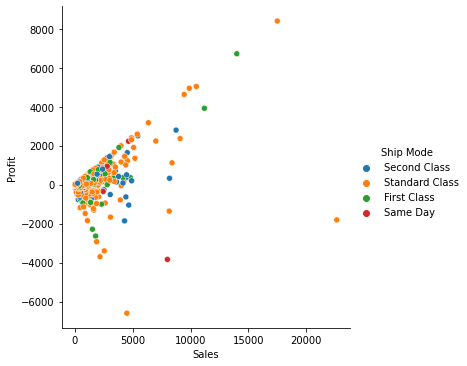

In [24]:
sns.relplot(x='Sales',y='Profit', hue='Ship Mode', data=new_data)

**Histogram**  - Is a graphical display of data using powers of different heights. In histogram each bar groups numbers into ranges. 
Basically shows the shape and the spread and continuous sample data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


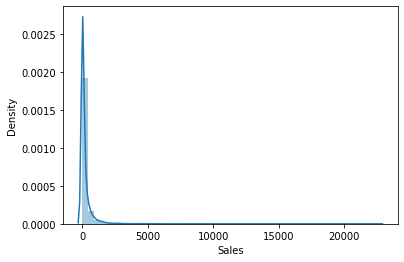

In [25]:
sns.distplot(new_data["Sales"])
#gives us distribution of columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


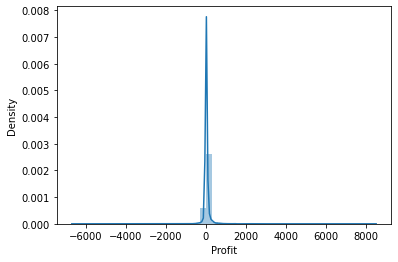

In [26]:
sns.distplot(new_data["Profit"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


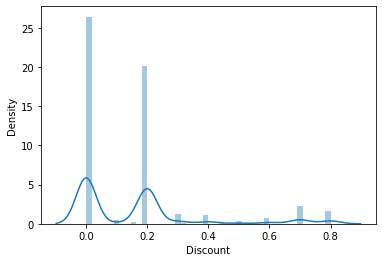

In [27]:
sns.distplot(new_data["Discount"])

**Categorical Plot** 

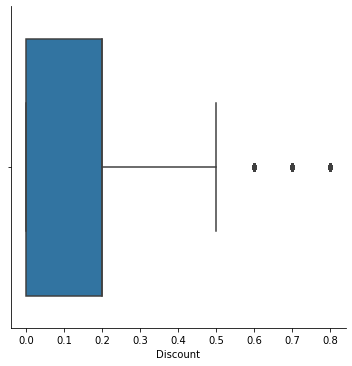

In [31]:
sns.catplot(x='Discount', kind='box', data= new_data)

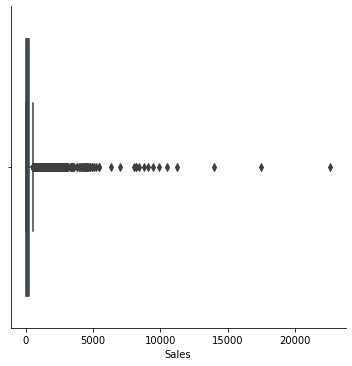

In [32]:
sns.catplot(x='Sales', kind='box', data= new_data)

**After seeing all these type of plots we can conclude that we get better insights from Scatter plot for our data set** 